In [1]:
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
spins = 64
P_plus_sample = 0
field_start = 0.1
field_stop = 5
field_steps = 1000

In [3]:
#dos_dir = "C:/Construct/DOS/dos" + str(spins) + "/"
dos_dir = "C:/Construct/DOS/dos" + str(spins) + " 100/"
H = np.linspace(field_start, field_stop, field_steps)
P_plus = np.array([])
J_sum = np.array([])
file_count = 0
max_gem_size = 0
arr_of_files = np.array([])
for file in os.listdir(dos_dir):
    file = dos_dir + file
    arr_of_files = np.append(arr_of_files, file)
    N = int(open(file).readlines()[0].rstrip())
    J_sum = np.append(J_sum, int(open(file).readlines()[2].rstrip()))
    P_plus = np.append(P_plus, (2 * N * (N - 1) + J_sum[file_count]) / (4 * N * (N - 1)))
    file_count += 1
idx = P_plus.argsort()
J_sum = J_sum[idx]
P_plus = P_plus[idx]
arr_of_files = arr_of_files[idx]

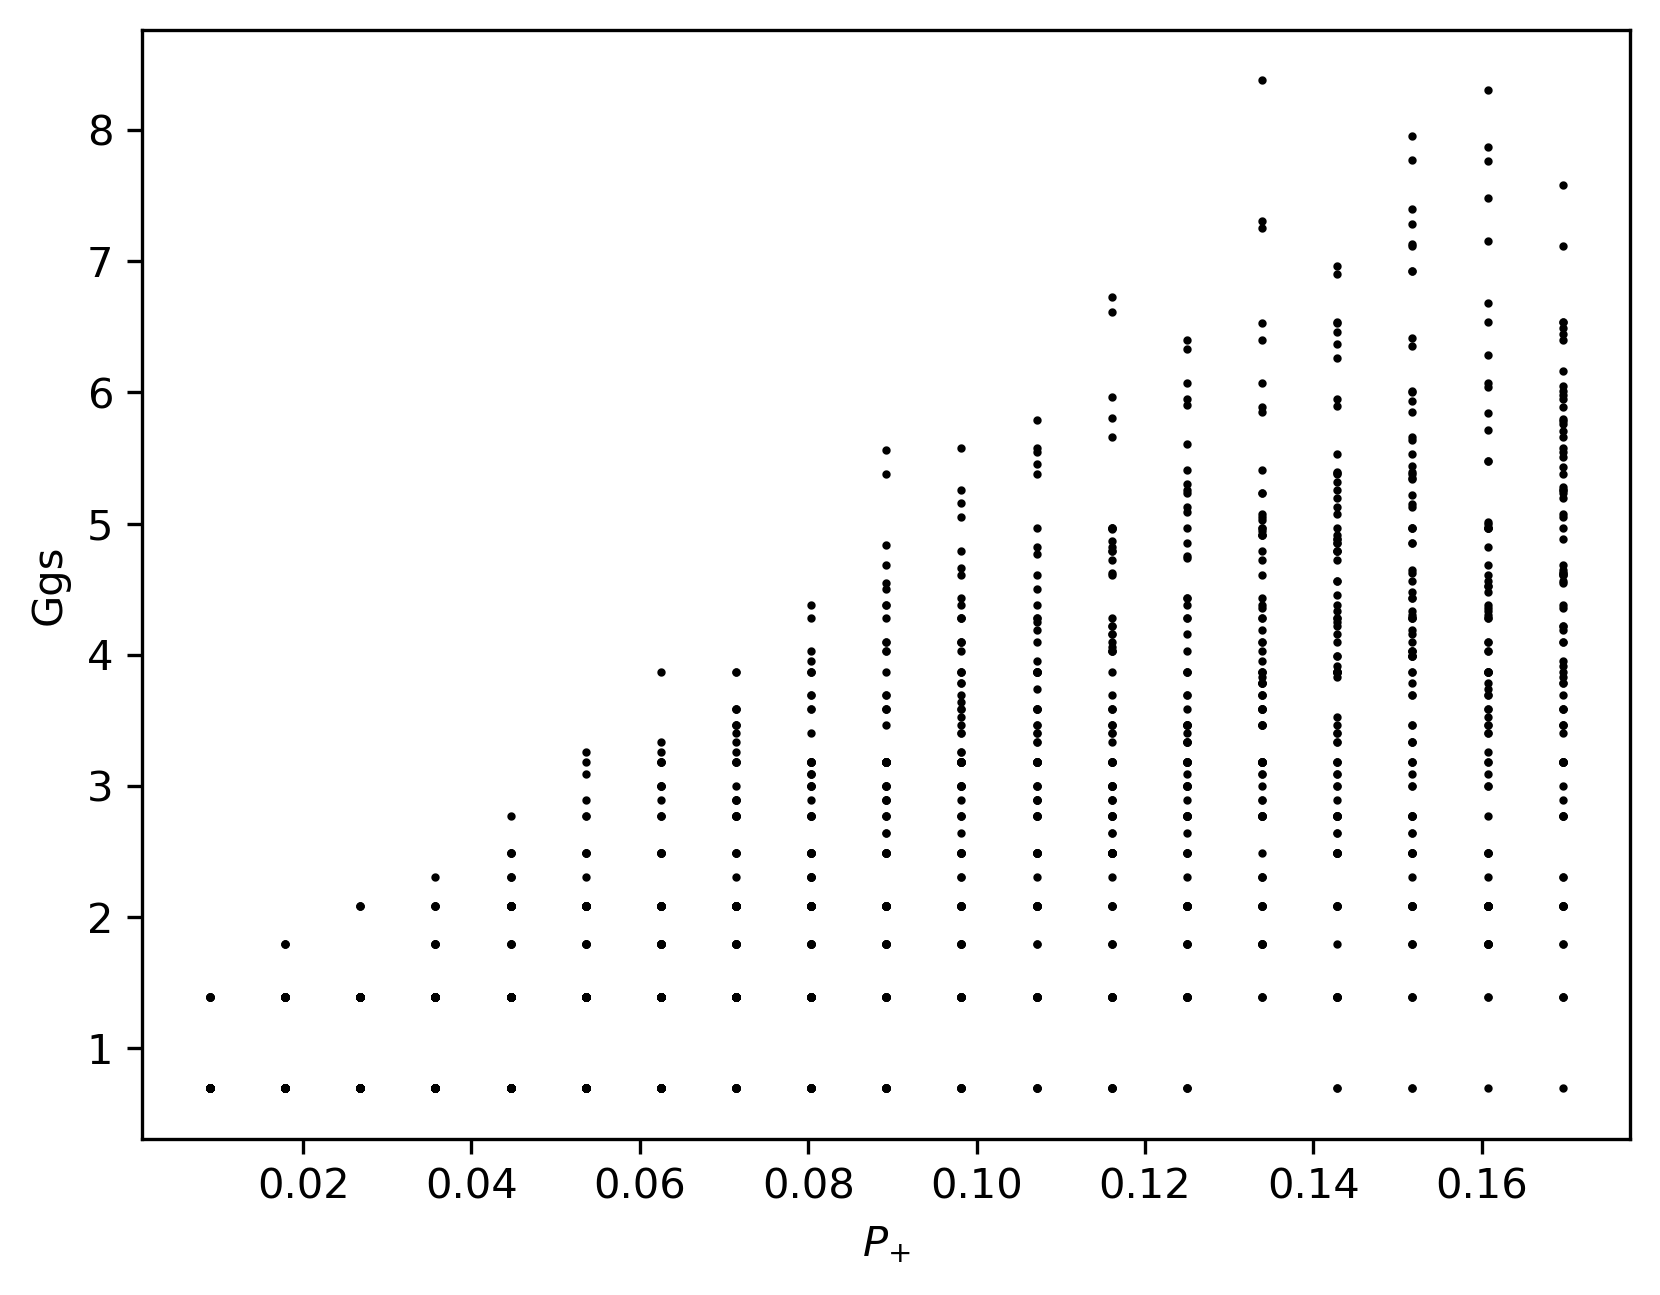

In [4]:
plt.figure(dpi=300)
P_plus_sample = 0
idxs = [i for i, x in enumerate(P_plus) if x > P_plus_sample]
for indx in idxs:
    file = arr_of_files[indx]
    gem = np.loadtxt(open(file), skiprows=4).T
    G = gem[0]
    E = gem[1]
    M = gem[2]
    Egs_idx = np.argwhere(E <= np.min(E) * 0.9999)
    Gsum = np.log(np.sum(G[Egs_idx]))
    plt.scatter(P_plus[indx], Gsum, color='black', s=1)
plt.xlabel("$P_{+}$")
plt.ylabel("Ggs")
#plt.savefig("../../Fractional_stairs.eps", format='eps', dpi=300)
plt.show()

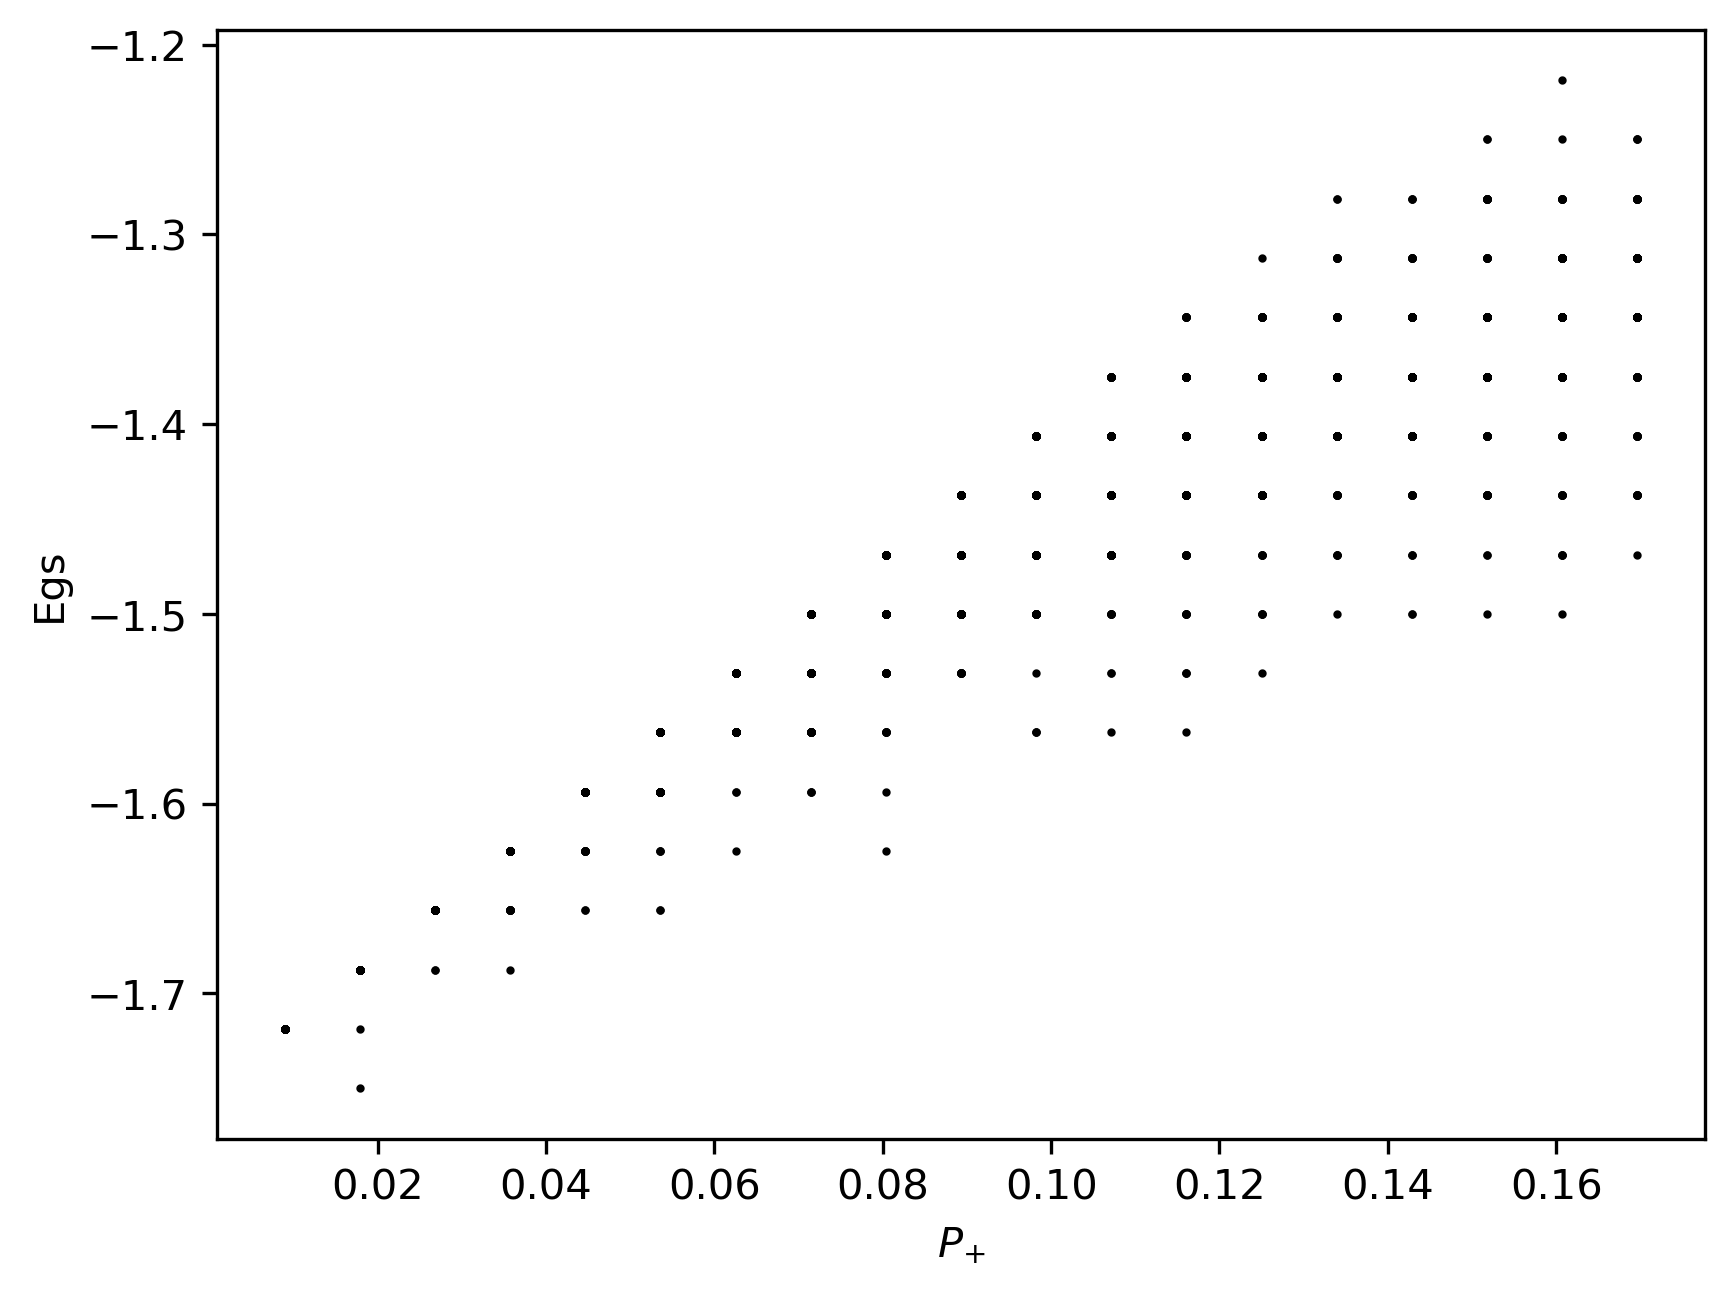

In [5]:
plt.figure(dpi=300)
P_plus_sample = 0
idxs = [i for i, x in enumerate(P_plus) if x > P_plus_sample]
for indx in idxs:
    file = arr_of_files[indx]
    gem = np.loadtxt(open(file), skiprows=4).T
    G = gem[0]
    E = gem[1]
    M = gem[2]
    Egs_idx = np.argwhere(E <= np.min(E) * 0.9999)
    Gsum = np.log(np.sum(G[Egs_idx]))
    plt.scatter(P_plus[indx], np.min(E) / (N * N), color='black', s=1)
plt.xlabel("$P_{+}$")
plt.ylabel("Egs")
#plt.savefig("../../Fractional_stairs.eps", format='eps', dpi=300)
plt.show()

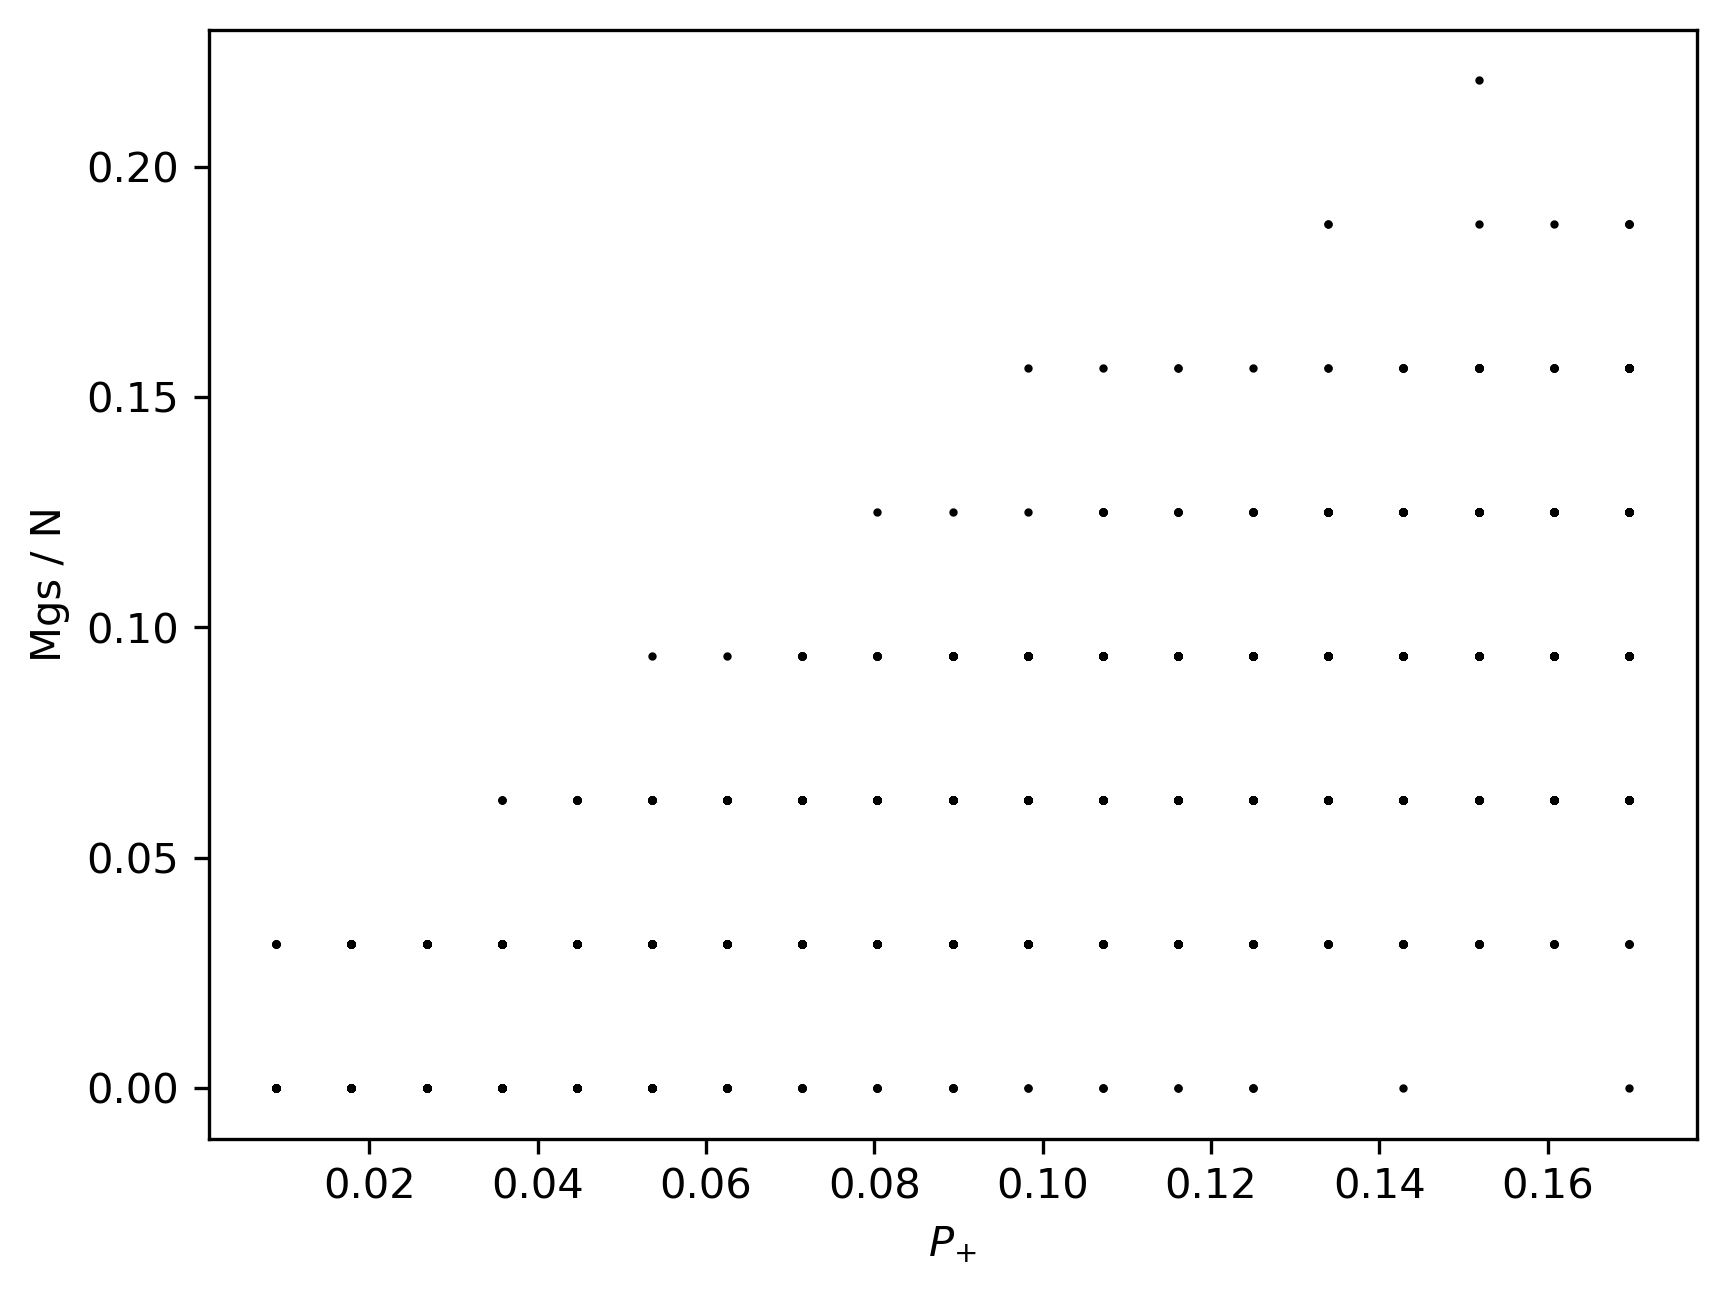

In [6]:
plt.figure(dpi=300)
P_plus_sample = 0
idxs = [i for i, x in enumerate(P_plus) if x > P_plus_sample]
for indx in idxs:
    file = arr_of_files[indx]
    gem = np.loadtxt(open(file), skiprows=4).T
    G = gem[0]
    E = gem[1]
    M = gem[2]
    Egs_idx = np.argwhere(E <= np.min(E) * 0.9999)
    plt.scatter(P_plus[indx], np.max((M[Egs_idx]) / (N * N)), color='black', s=1)
plt.xlabel("$P_{+}$")
plt.ylabel("Mgs / N")
#plt.savefig("../../Mgs(P+).eps", format='eps', dpi=300)
plt.show()

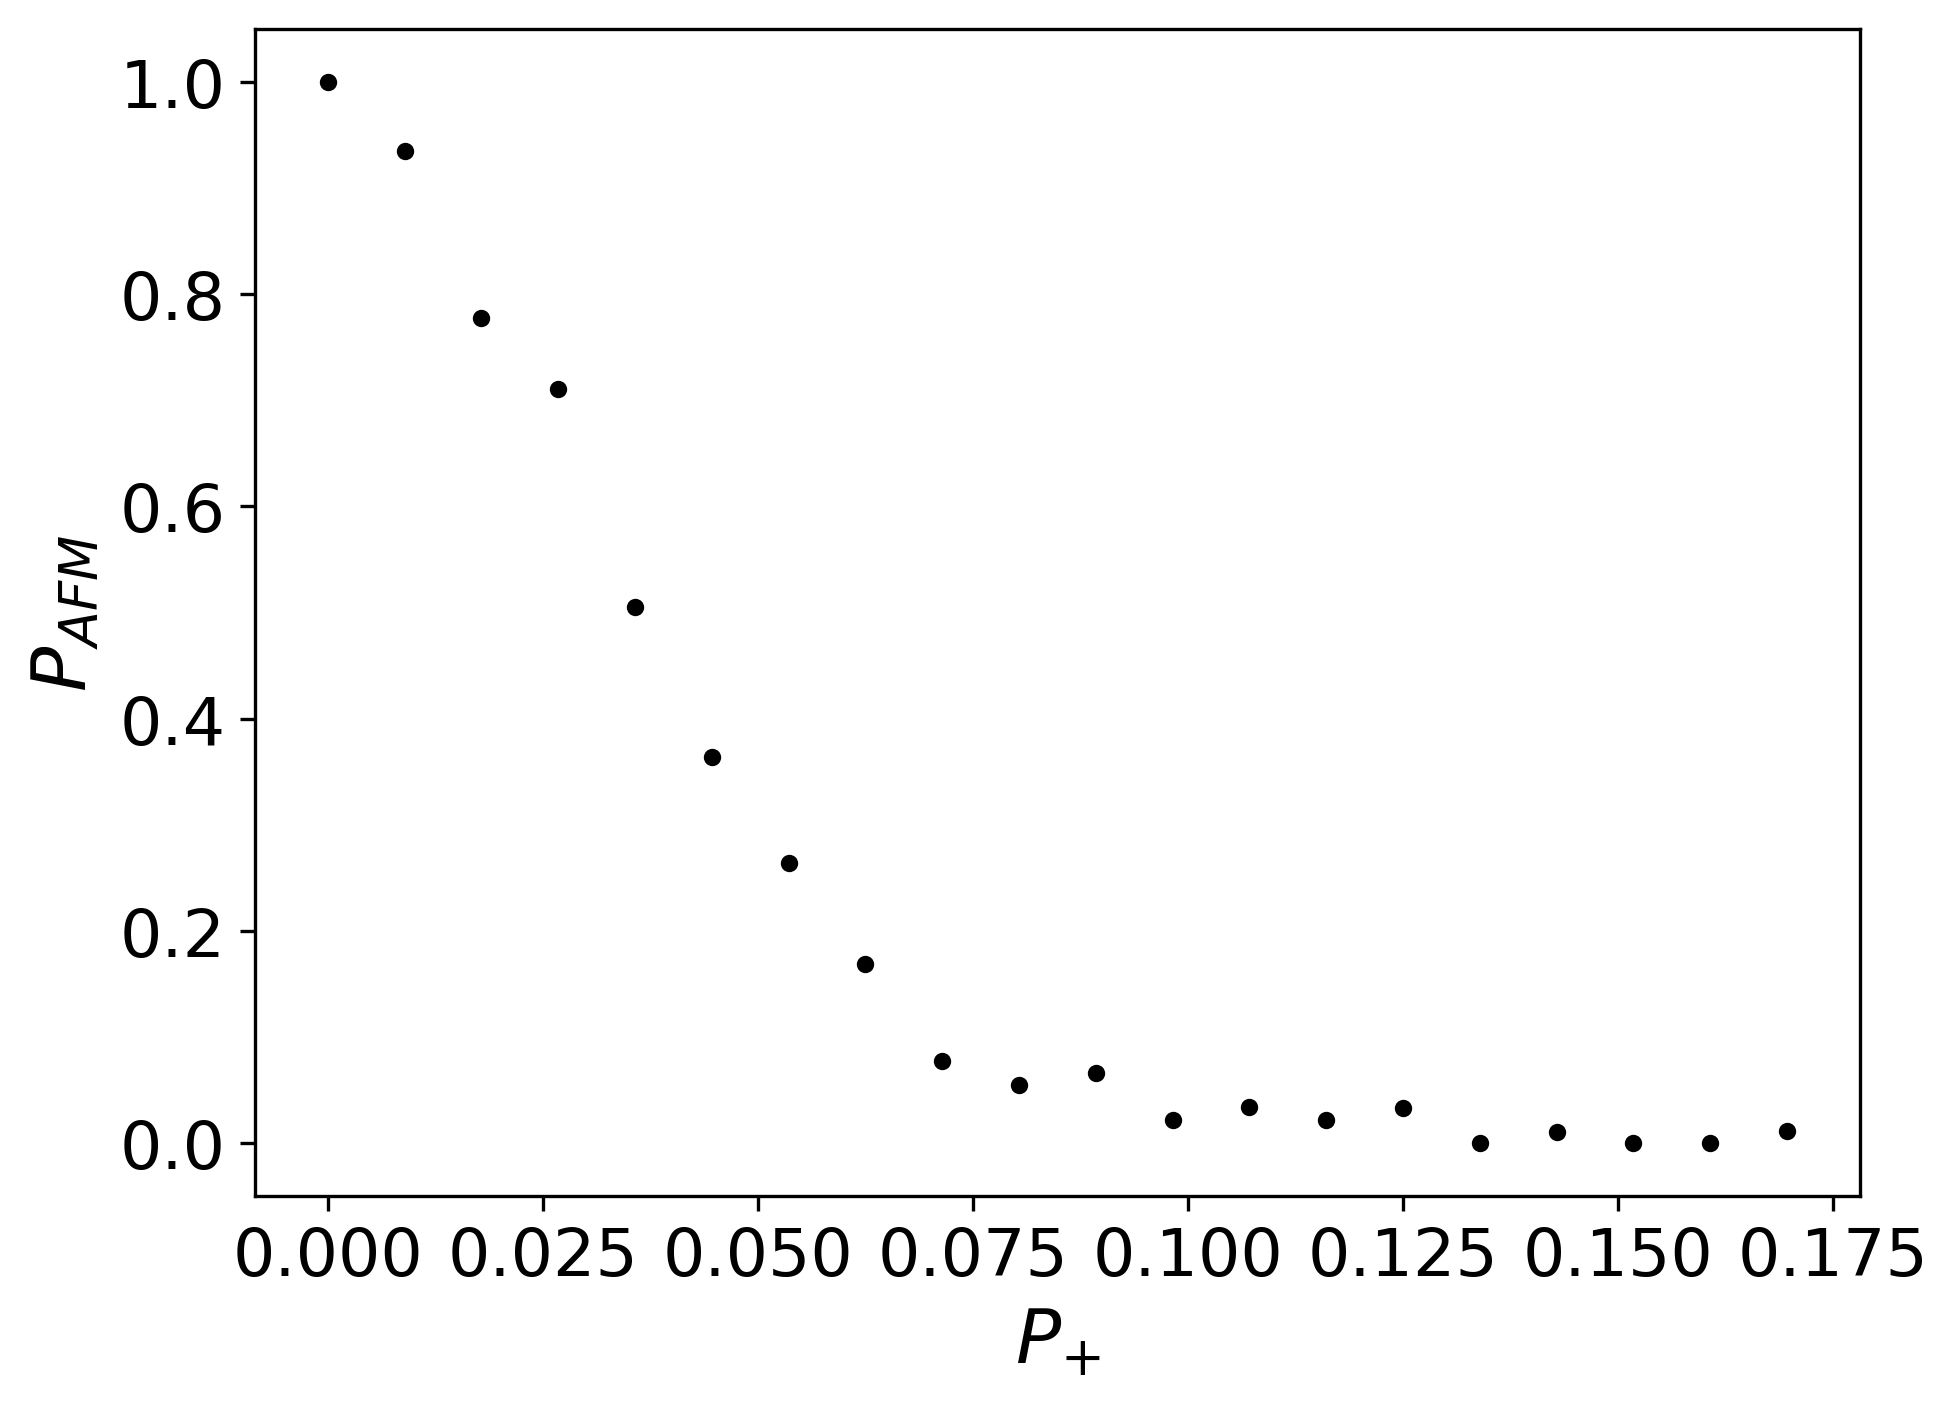

In [7]:
plt.figure(dpi=300)
P_plus_sample = 0
idxs = [i for i, x in enumerate(P_plus) if x >= P_plus_sample]
P_plus_local = P_plus[idxs]
Mgs = []
for indx in idxs:
    file = arr_of_files[indx]
    gem = np.loadtxt(open(file), skiprows=4).T
    G = gem[0]
    E = gem[1]
    M = gem[2]
    Egs_idx = np.argwhere(E <= np.min(E) * 0.9999)
    Mgs.append(np.max((M[Egs_idx]) / (N * N)))
    #plt.scatter(P_plus[indx], Mgs[indx-1], color='black', s=1)
Mgs = np.array(Mgs)
P_unique = np.unique(P_plus_local)
for P_u in P_unique:
    mask = P_plus_local == P_u
    pMgs = Mgs[mask]
    prob = np.sum(pMgs == 0) / len(pMgs)
    plt.scatter(P_u, prob, color='black', s=10)
plt.xlabel("$P_{+}$", fontsize=18)
plt.ylabel("$P_{AFM}$", fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.tight_layout()
#plt.savefig("../../P_AFM_Mmax.eps", format='eps', dpi=300)
plt.show()

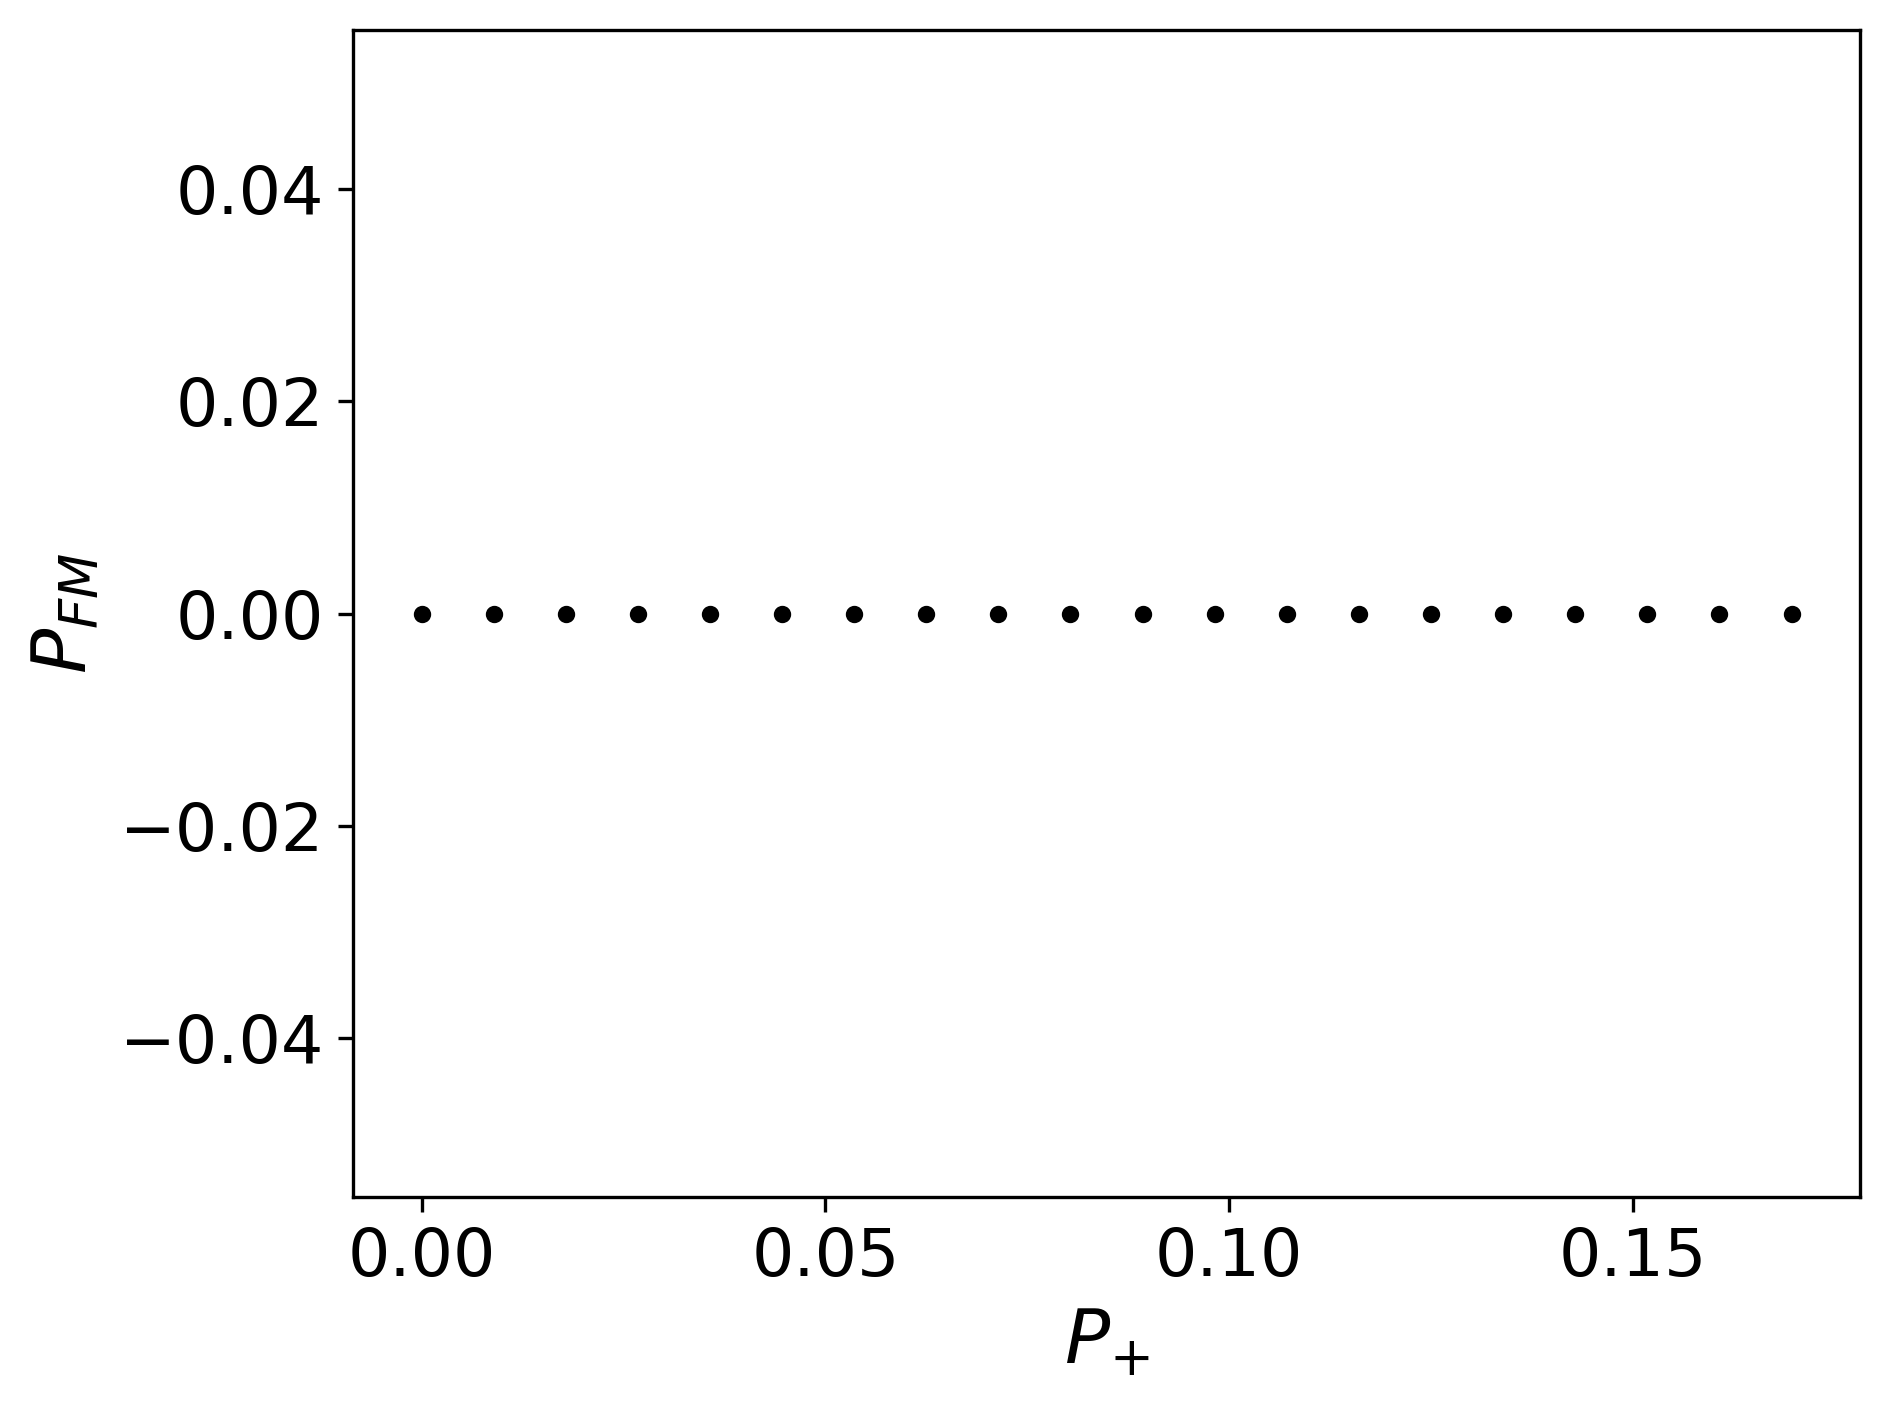

In [8]:
plt.figure(dpi=300)
P_plus_sample = 0
idxs = [i for i, x in enumerate(P_plus) if x >= P_plus_sample]
P_plus_local = P_plus[idxs]
Mgs = []
for indx in idxs:
    file = arr_of_files[indx]
    gem = np.loadtxt(open(file), skiprows=4).T
    G = gem[0]
    E = gem[1]
    M = gem[2]
    Egs_idx = np.argwhere(E <= np.min(E) * 0.9999)
    Mgs.append(np.max((M[Egs_idx]) / (N * N)))
    #plt.scatter(P_plus[indx], Mgs[indx-1], color='black', s=1)
Mgs = np.array(Mgs)
P_unique = np.unique(P_plus_local)
for P_u in P_unique:
    mask = P_plus_local == P_u
    pMgs = Mgs[mask]
    prob = np.sum(pMgs == 1) / len(pMgs)
    plt.scatter(P_u, prob, color='black', s=10)
plt.xlabel("$P_{+}$", fontsize=18)
plt.ylabel("$P_{FM}$", fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.tight_layout()
#plt.savefig("../../P_FM_Mmax.eps", format='eps', dpi=300)
plt.show()

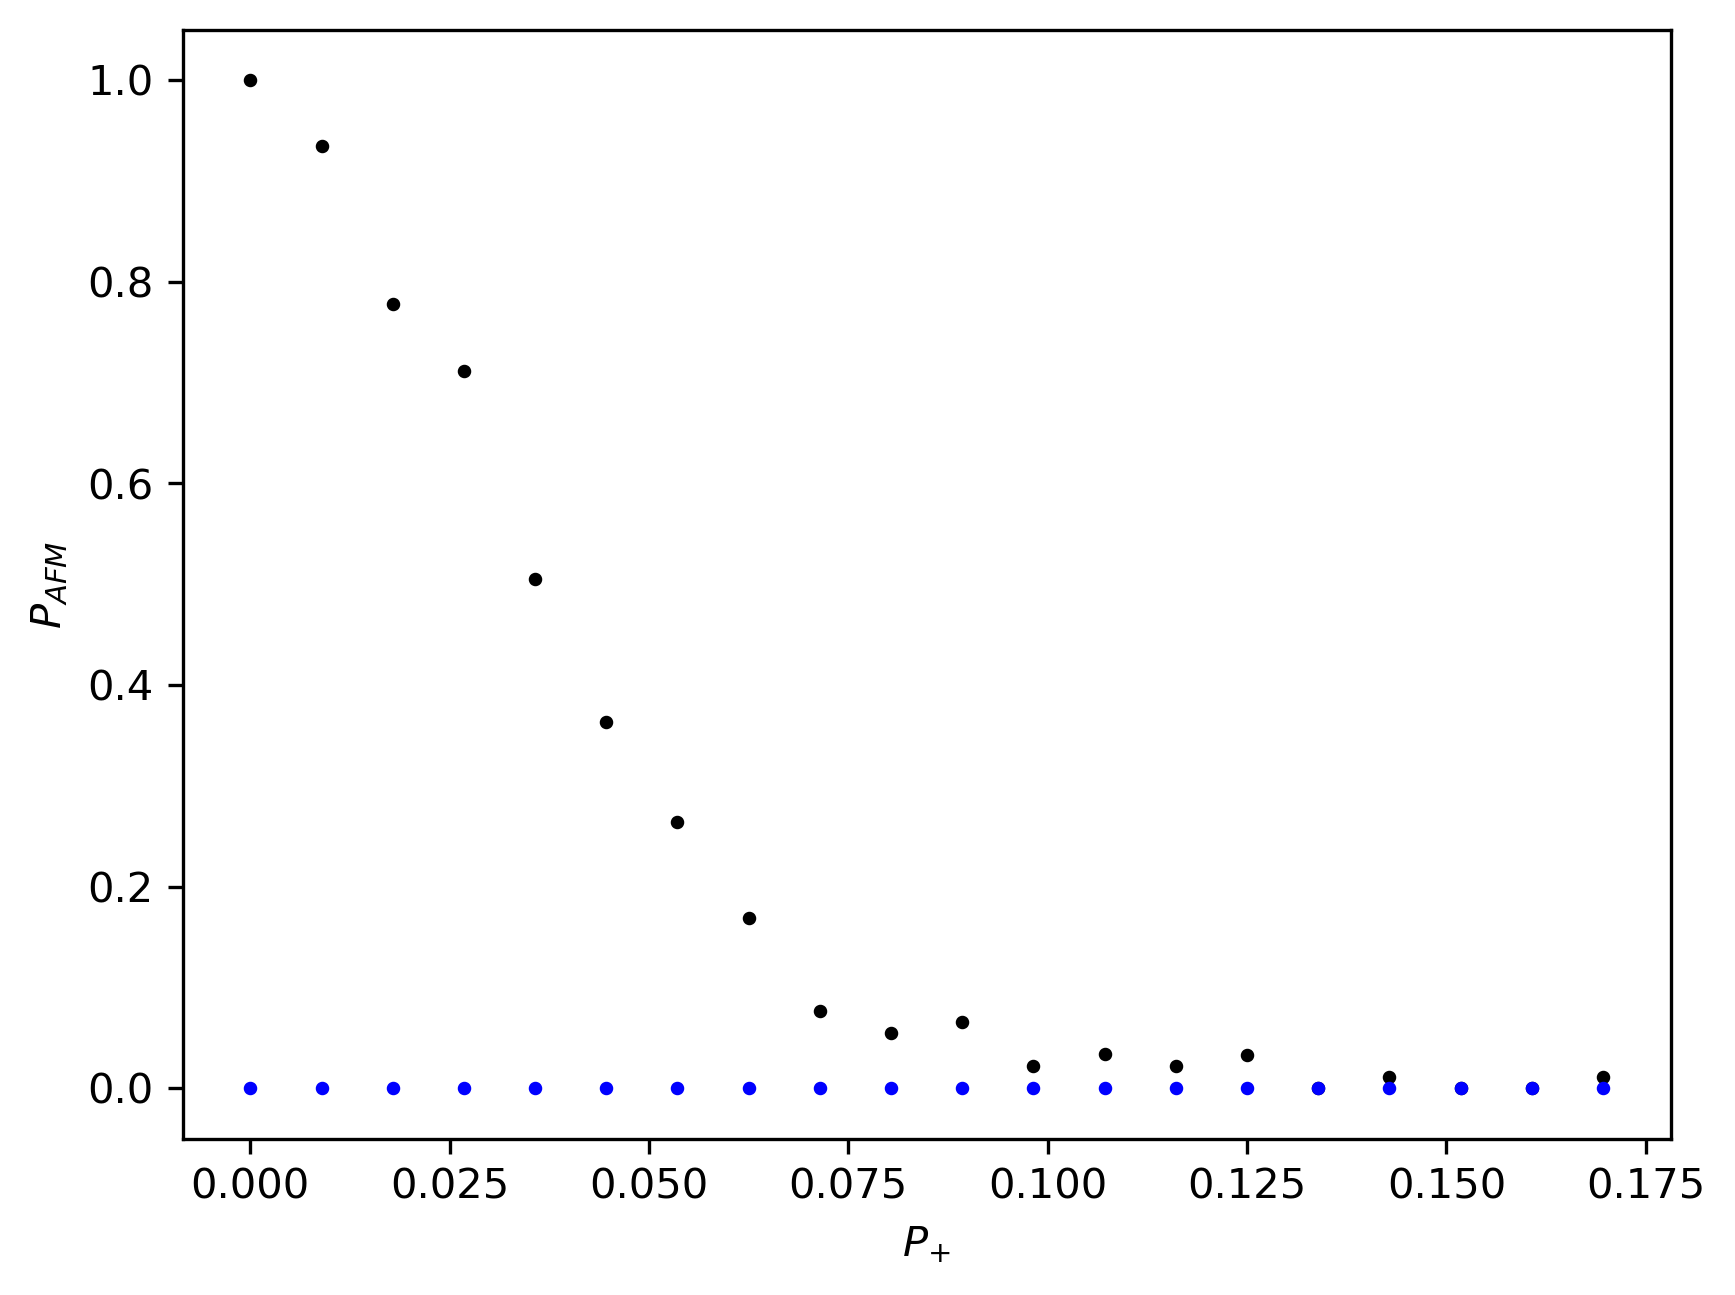

In [9]:
plt.figure(dpi=300)
P_plus_sample = 0
idxs = [i for i, x in enumerate(P_plus) if x >= P_plus_sample]
P_plus_local = P_plus[idxs]
Mgs = []
for indx in idxs:
    file = arr_of_files[indx]
    gem = np.loadtxt(open(file), skiprows=4).T
    G = gem[0]
    E = gem[1]
    M = gem[2]
    Egs_idx = np.argwhere(E <= np.min(E) * 0.9999)
    Mgs.append(np.max((M[Egs_idx]) / (N * N)))
    #plt.scatter(P_plus[indx], Mgs[indx-1], color='black', s=1)
Mgs = np.array(Mgs)
P_unique = np.unique(P_plus_local)
for P_u in P_unique:
    mask = P_plus_local == P_u
    pMgs = Mgs[mask]
    probAFM = np.sum(pMgs == 0) / len(pMgs)
    probFM = np.sum(pMgs == 1) / len(pMgs)
    plt.scatter(P_u, probAFM, color='black', s=5)
    plt.scatter(P_u, probFM, color='blue', s=5)
plt.xlabel("$P_{+}$")
plt.ylabel("$P_{AFM}$")
#plt.savefig("../../P_AFM_FM_Mmax.eps", format='eps', dpi=300)
plt.show()

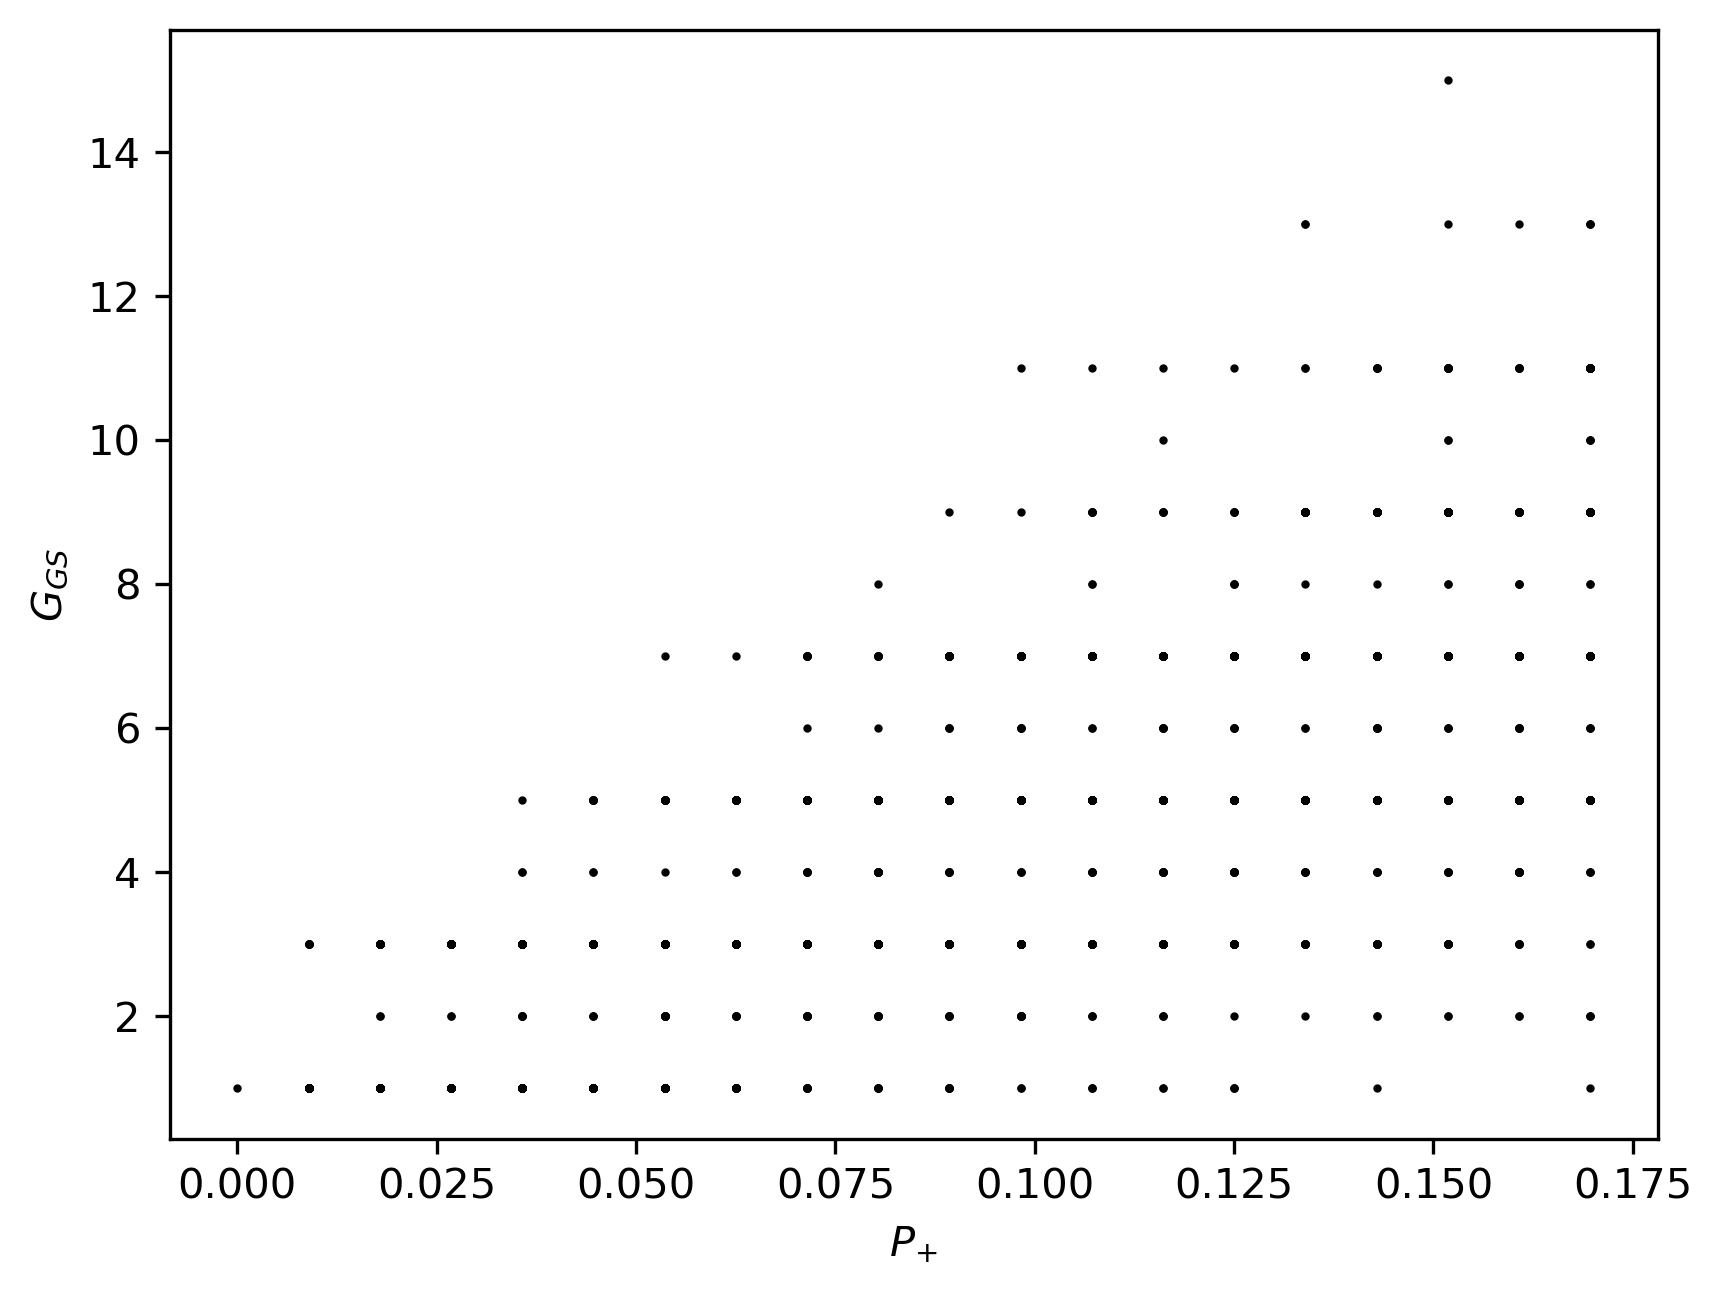

In [10]:
plt.figure(dpi=300)
P_plus_sample = 0
idxs = [i for i, x in enumerate(P_plus) if x >= P_plus_sample]
for indx in idxs:
    file = arr_of_files[indx]
    gem = np.loadtxt(open(file), skiprows=4).T
    G = gem[0]
    E = gem[1]
    M = gem[2]
    Egs_idx = np.argwhere(E <= np.min(E) * 0.9999)
    plt.scatter(P_plus[indx], np.size(M[Egs_idx] * G[Egs_idx]), color='black', s=1)
plt.xlabel("$P_{+}$")
plt.ylabel("$G_{GS}$")
#plt.savefig("../../Ggs.eps", format='eps', dpi=300)
plt.show()

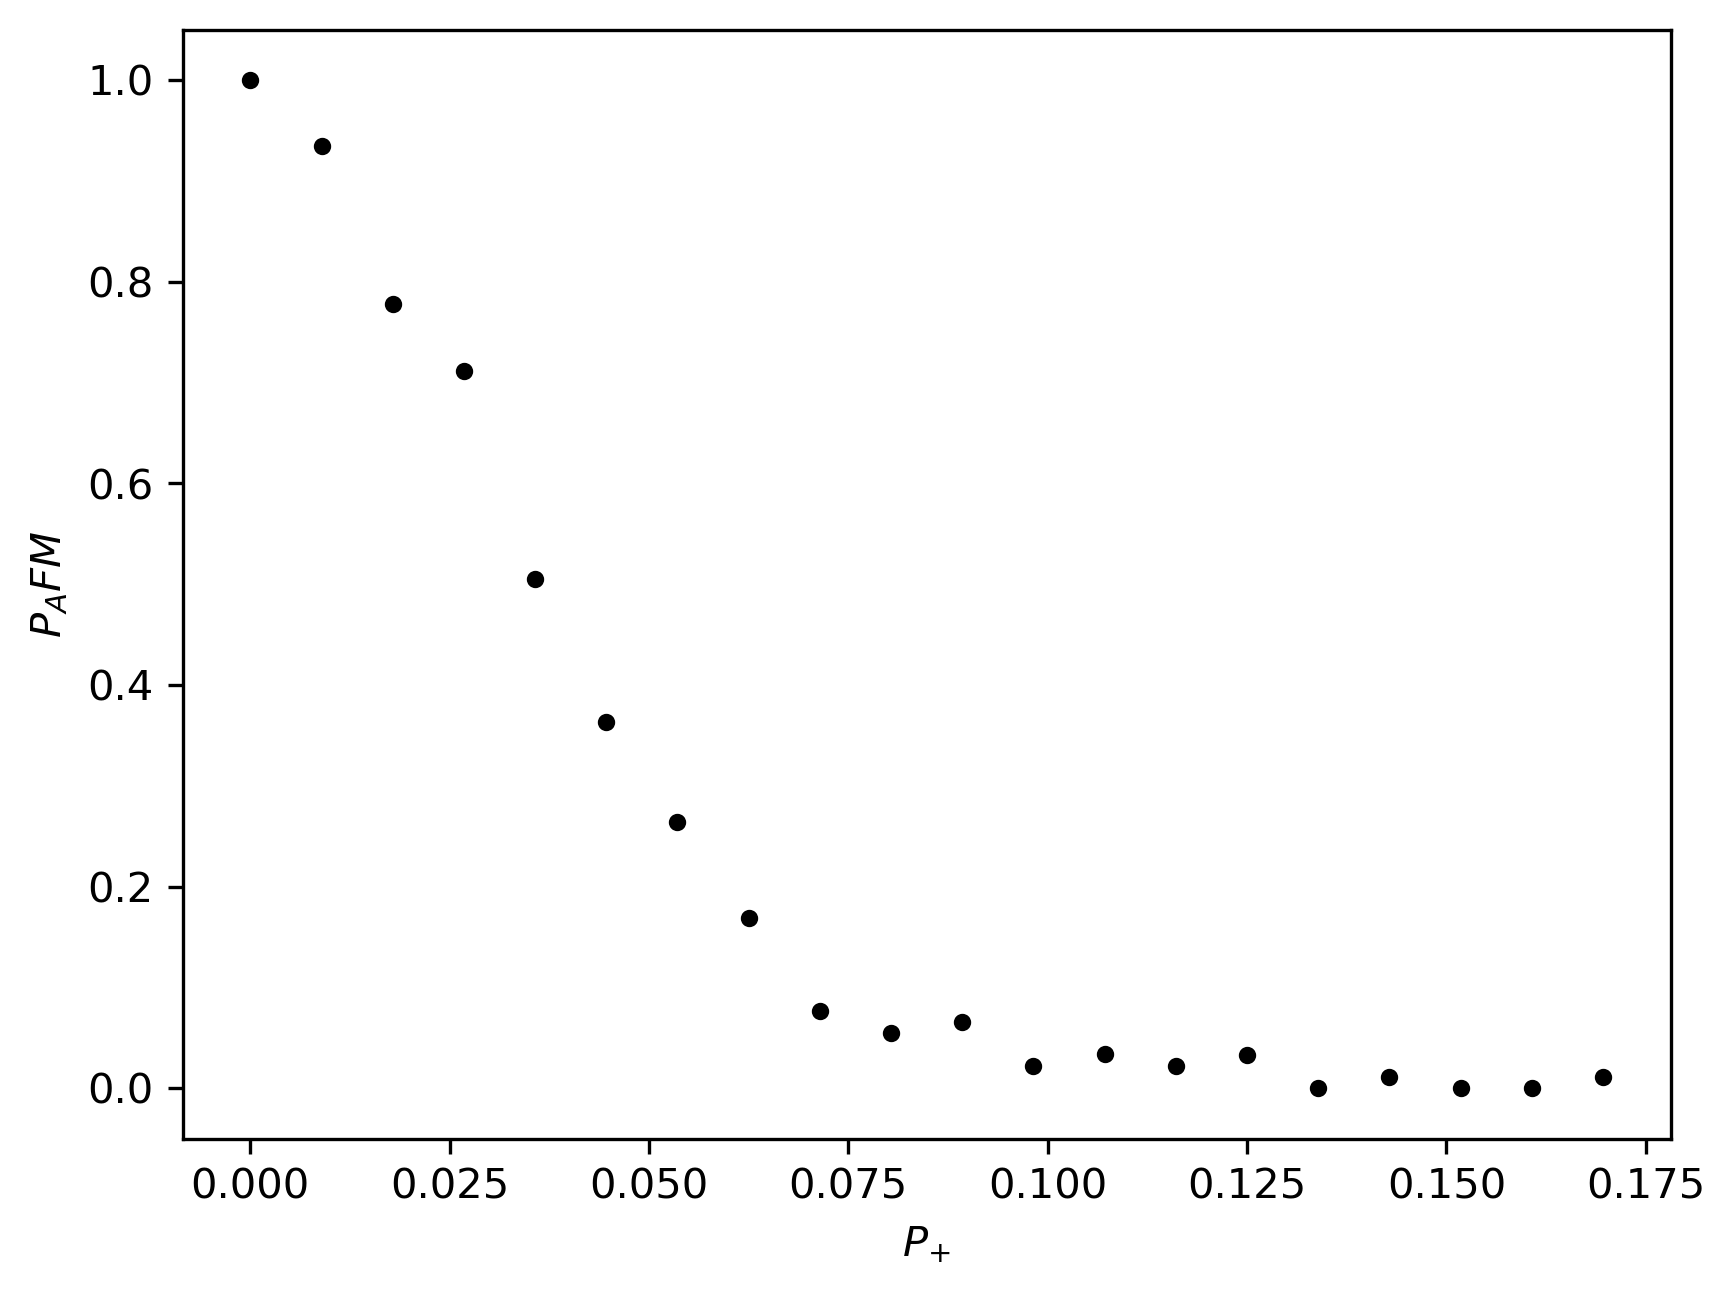

In [11]:
plt.figure(dpi=300)
P_plus_sample = 0
idxs = [i for i, x in enumerate(P_plus) if x >= P_plus_sample]
P_plus_local = P_plus[idxs]
GMgs = []
for indx in idxs:
    file = arr_of_files[indx]
    gem = np.loadtxt(open(file), skiprows=4).T
    G = gem[0]
    E = gem[1]
    M = gem[2]
    Egs_idx = np.argwhere(E <= np.min(E) * 0.9999)
    GMgs.append(np.size(M[Egs_idx]))
GMgs = np.array(GMgs)
#for indx in idxs:
#    plt.scatter(P_plus[indx], GMgs[indx], color='black', s=1)
P_unique = np.unique(P_plus_local)
for P_u in P_unique:
    mask = P_plus_local == P_u
    pGMgs = GMgs[mask]
    prob = np.sum(pGMgs == 1) / len(pGMgs)
    plt.scatter(P_u, prob, color='black', s=10)
plt.xlabel("$P_{+}$")
plt.ylabel("$P_AFM$")
#plt.savefig("../../P_AFM_G(Mgs).eps", format='eps', dpi=300)
plt.show()

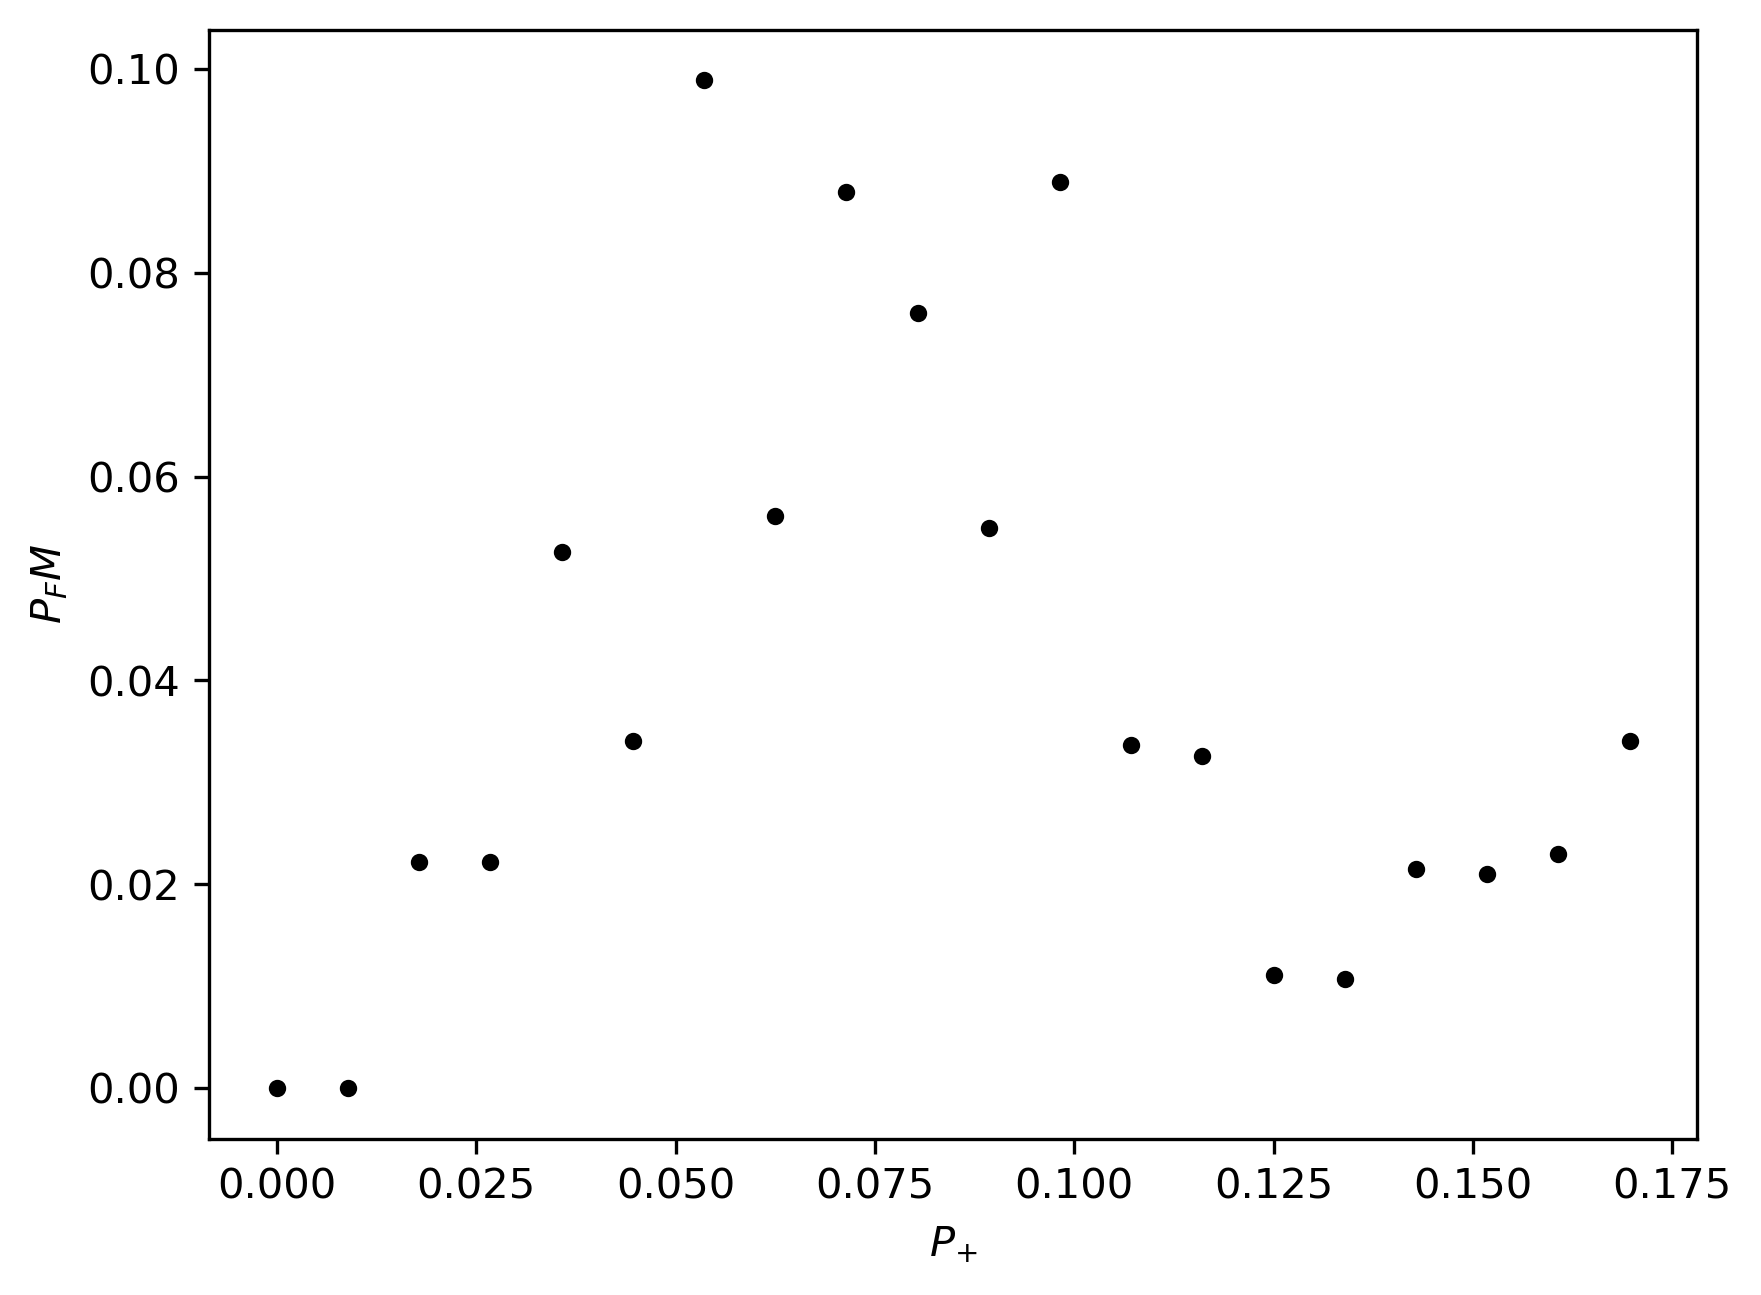

In [12]:
plt.figure(dpi=300)
P_plus_sample = 0
idxs = [i for i, x in enumerate(P_plus) if x >= P_plus_sample]
P_plus_local = P_plus[idxs]
GMgs = []
for indx in idxs:
    file = arr_of_files[indx]
    gem = np.loadtxt(open(file), skiprows=4).T
    G = gem[0]
    E = gem[1]
    M = gem[2]
    Egs_idx = np.argwhere(E <= np.min(E) * 0.9999)
    GMgs.append(np.size(M[Egs_idx]))
GMgs = np.array(GMgs)
#for indx in idxs:
#    plt.scatter(P_plus[indx], GMgs[indx], color='black', s=1)
P_unique = np.unique(P_plus_local)
for P_u in P_unique:
    mask = P_plus_local == P_u
    pGMgs = GMgs[mask]
    prob = np.sum(pGMgs == 2) / len(pGMgs)
    plt.scatter(P_u, prob, color='black', s=10)
plt.xlabel("$P_{+}$")
plt.ylabel("$P_FM$")
#plt.savefig("../../P_FM_G(Mgs).eps", format='eps', dpi=300)
plt.show()